In [6]:
!pip3 install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

In [9]:
df = pd.read_csv('/data/lens_demo_feature_engineering_2022_01_22_11_25_42_061.csv')

In [11]:
df.shape

(7043, 20)

In [17]:
df.head(5).style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


### Do note we have already
####  excluded Customer ID using Lens
####  converted totalcharges to integer
####  replaced blank values in totalcharges by Median
## using Refract Lens functionality.

In [20]:
df.describe().style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.446969
std,0.368612,24.559481,30.090047,2265.267532
min,0.000000,0.000000,18.250000,18.000000
25%,0.000000,9.000000,35.500000,401.500000
50%,0.000000,29.000000,70.350000,1397.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [26]:
df.corr().style.set_properties(**{'background-color':'black',
                                     'color': 'red'})

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.016567,0.220173,0.102653
tenure,0.016567,1.000000,0.247900,0.825465
monthlycharges,0.220173,0.247900,1.000000,0.650864
totalcharges,0.102653,0.825465,0.650864,1.000000


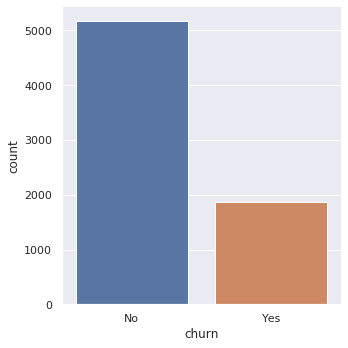

In [25]:
#Check the distribution of Churn {target class}
sns.catplot(x="churn", kind="count", data=df)

#### Let's check Impact of features on Monthly charges ####